# STA 141B Assignment 1

Due __January 26, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. The total number of points is 10. 

__Exercise 1__

This exercise will review basic concepts of programming. Only use pure python code and no methods (like `str.find`) that are optimized in, e.g., `C`. Likewise, do not use any packages except those suitable for parallelization in part (c). 



__(a)__ Write a recursive function `seq_count(x, ...)` that returns length of the longest subsequence of identical elements in the sequence object `x`. Run: 
```
seq_count([[1], [1], [1], 1, 3, 3, 2, 2, 4, 0])
seq_count(('G', 'g', 'a', "a", "a", '''a''', 2, 's', 's'))
seq_count([3, 1, int(True), 1, 1, 1, 3, 3])
seq_count((1, 3, None, 3, 3, 1, 3, 3, 4, 0))
```

In [1]:
def seq_count(x, position = 1, current_length = 1, max_length = 1): 
    if len(x) <= position:
        return max_length
    elif x[position - 1] is x[position]:
        return seq_count(x, position + 1, current_length + 1, max(current_length + 1, max_length))
    else: 
        return seq_count(x, position + 1, 1, max_length)

In [2]:
seq_count([1, 3, 1, 1, 3, 3, 4, 4, 4])

3

In [3]:
seq_count((1, 3, 1, 1, 1, '1', 1, [3, 3, 3, 3], 3, 4, 0))

3

In [2]:
seq_count([[1], [1], [1], 1, 3, 3, 2, 2, 4, 0])

2

In [5]:
seq_count(('G', 'g', 'a', "a", "a", '''a''', 2, 's', 's'))

4

In [6]:
seq_count([3, 1, int(True), 1, 1, 1, 3, 3])

5

In [7]:
seq_count((1, 3, None, 3, 3, 1, 3, 3, 4, 0))

2

__(b)__ Write a function `pattern_count(x, pattern, ...)` that takes the two iterable objects `x` and `pattern` and returns the length of the longest subsequence of `pattern`. Run: 
```
pattern_count('CGGACTACTAGACT', 'ACT')
pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1])
pattern_count(['ab', 'ab', 'a', 'a', 'b'], ('ab',))
```

In [8]:
def pattern_count(x, pattern, position = 0, current_length = 0, max_length = 0): 
    pattern_length = len(pattern)
    if len(x) < position + pattern_length:
        return max_length
    elif all([j is pattern[i] for i, j in enumerate(x[position:(position + pattern_length)])]):
        return pattern_count(x, pattern, 
                             position + pattern_length, current_length + 1, 
                             max(current_length + 1, max_length))
    else: 
        return pattern_count(x, pattern, position + 1, 0, max_length)

In [9]:
pattern_count([0, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 4, 1, 2], (1, 2))

3

In [10]:
pattern_count([], [2])

0

In [11]:
pattern_count(['ab', 'ab', 'a', 'a', 'b'], 'ab') # elements in pattern must be identical to elements in x! 

1

In [12]:
pattern_count('CGGACTACTAGACT', 'ACT')

2

In [13]:
pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1])

1

In [14]:
pattern_count(['ab', 'ab', 'a', 'a', 'b'], ('ab',))

2

In [15]:
def simple_pattern_count(x, pattern, current_pattern = None, max_length = 0): 
    if current_pattern is None: 
        current_pattern = pattern
    if x.find(current_pattern) >= 0: 
        return simple_pattern_count(x, pattern, current_pattern + pattern, max_length + 1)
    else: 
        return max_length

In [16]:
from timeit import timeit
from random import choices

x = "".join(choices('acgt', k=1_000))
print(timeit('pattern_count(x, "t")', number=10_000, globals=globals()))
print(timeit('simple_pattern_count(x, "t")', number=10_000, globals=globals()))

6.694851167
0.03094037500000013


`simple_pattern_count` is much faster, because the `str.find` method is efficiently implemented in C.

__(c)__ For a long string, write code that takes strings `x`, `pattern`, and an integer `n_splits`, and uses a suitable concurrency method to search for repeating patterns using `pattern_count` from (b). 
To this end, partition `x` into `n_splits` parts and search each of them individually. Make sure not to split where a pattern is present! Run: 
```
from random import choices, seed

seed(2024)
x = "".join(choices('01', k = 5_000))
pattern = "01"
n_splits = 50

# here is your code 
```

_Hint: You can use the fast `x.find(pattern)` to check your code._

In [17]:
def check_for_pattern(position, pattern, x):
    '''
    returns True if pattern is found at breaking position
    '''
    pattern_length = len(pattern)
    y = x[(position - pattern_length + 1):(position + pattern_length)]
    pattern_found = False
    for i in range(len(y) - pattern_length):
        if all([j is pattern[i] for i, j in enumerate(y[i:(i + pattern_length)])]):
            pattern_found = True
            break
    return pattern_found

def split_x(x, n_splits, pattern): 
    '''
    partitions x into n_splits parts, but does not interrupt a pattern
    '''
    
    # gather list of candidate break points
    indices = [(i + 1) * int(len(x) / n_splits) for i in range(n_splits - 1)]

    # shift them to the right if pattern is present
    for i, position in enumerate(indices):
        while check_for_pattern(position, pattern, x): 
            position += len(pattern)
        indices[i] = position
        
    print()

    # split x by indices
    y = [x[i:j] for i, j in zip([0]+indices, indices+[None])]
    
    return y

In [18]:
from random import choices, seed

seed(2024)
x = "".join(choices('01', k = 5_000))
pattern = "01"
n_splits = 50

import multiprocessing
multiprocessing.set_start_method("fork", True) # just for macos (?)
    
# define the function here to avoid pickling error   
def specific_pattern_count(x): 
    return pattern_count(x, '01')

pool = multiprocessing.Pool()
max(pool.map(specific_pattern_count, split_x(x, n_splits, '01')))

7

__Exercise 2__

In this exercise, we will generate (pseudo-)random numbers using the inversion and accept-reject method. In order to generate the random numbers you are only allowed draw from the Uniform distribution and use
```
from random import uniform
from scipy.special import binom
from numpy import sqrt, pi, exp, tan, cumsum
from scipy.stats import probplot
import pandas as pd
import matplotlib.pyplot as plt
```

_Inversion method: Let $F$ be a distribution function from which we want to draw. Define the quantile function $F^{-1}(u) = \inf\{x\colon F(x)\geq u, 0\leq u\leq 1\}$. Then, if $U\sim Unif[0,1]$, $F^{-1}(U)$ has distribution function $F$._

_Accept-reject: Let $f$ be a density function from which we want to draw and there exists a density $g$ from which we can draw (e.g., via the inversion method) and for which there exists a constant $c$ such that $f(x)\leq cg(x)$ for all $x$. The following algorithm generates a random variable $X$ with density function $f$._

1. Generate a random variable $X$ from density $g$
2. Generate a random variable $U\sim Unif[0,1]$ (independent from $X$)
3. If $Ucg(X) \leq f(X)$, return $X$, otherwise repeat 1.-3.

_The number of iterations needed to successfully generate $X$ is itself a random variable,
which is geometrically distributed with the success (acceptance) probability $p = P(Ucg(X)\leq f(X))$. Hence, the expected number of iterations is $1/p$. Some calculations show that $p = 1/c$._


__(a)__ Generate $10 000$ samples from $Bin(10, 0.4)$ using __(i)__ the inversion method directly and __(ii)__ using the inversion method to draw corresponding Bernoulli distributed samples. __(iii)__ Plot the resulting empirical distribution functions and add the theoretical distribution function in one figure. 

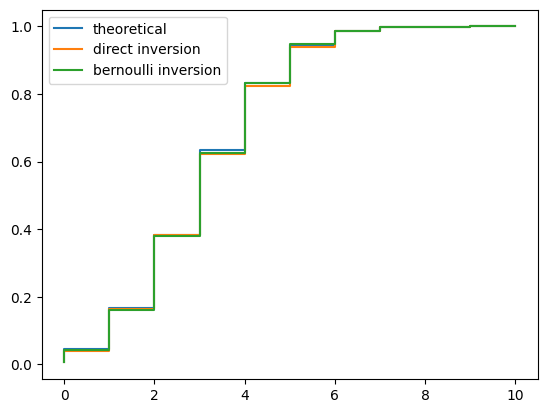

In [19]:
from random import uniform
from scipy.special import binom
from numpy import sqrt, pi, exp, tan, cumsum
import pandas as pd

n = 10
p = 0.4

# (i)
F = cumsum([binom(n, k) * p ** k * (1 - p) ** (n - k) for k in range(n + 1)])
binomial = lambda u: sum(u > F)
variant1 = [binomial(uniform(0, 1)) for _ in range(10_000)]

# (ii)
bern = lambda u: True if u < p else False
variant2 = [sum([bern(uniform(0, 1)) for i in range(n)]) for _ in range(10_000)]

# (iii) 
F = pd.Series(F)
F1 = cumsum(pd.Series(variant1).value_counts().sort_index()) / 10_000
F2 = cumsum(pd.Series(variant2).value_counts().sort_index()) / 10_000

import matplotlib.pyplot as plt
plt.step(F.index, F.values, label = "theoretical") 
plt.step(F1.index, F1.values, label = "direct inversion") 
plt.step(F2.index, F2.values, label = "bernoulli inversion") 
plt.legend() 
plt.show()

__(b)__ Generate $10000$ samples from the standard normal distribution using the accept-reject method with candidate density $g(x) = (\pi(1+x^2))^{-1}$ with distribution funciton $G(x) = \tan^{-1}(x)/\pi$ from the standard Cauchy distribution. To this end, __(i)__ determine (mathematically or via simulation) the value of $c\geq1$ closest to one so that $f(x)\leq cg(x)$ for all $x$. __(ii)__ Obtain $10000$ standard normal random variables using the accept-reject method, generating Cauchy distributed random variables using inversion method. 
__(iii)__ Compare estimated and theoretical acceptance probabilities. 
__(iv)__ Generate a QQ-plot of the generated sample. 

__(a)__ We want to maximize 
$$c = \frac{f(x)}{g(x)} = \sqrt{\frac{\pi}{2}}\exp(-x^2 / 2)(1 + x^2).$$
Taking derivatives and setting to zero gives: 
$$\exp(-x^2/2) (x - x^3) = 0 \Rightarrow x \in \{-1, 0, 1\}$$
A second derivative reveals that the maxima are at one and negative one. Thus: 
$$
c = \sqrt{\frac{2\pi}{\exp(1)}}
$$

In [20]:
f = lambda x: exp(-x**2 / 2) / sqrt(2 * pi)
g = lambda x: 1 / (pi * (1 + x ** 2))
print(f(1) / g(1))

c = sqrt(2 * pi / exp(1))
c

1.520346901066281


1.520346901066281

In [21]:
# (ii)
Ginv = lambda u: tan(u * pi) # inverse of G
count = 0

def accept_reject(): 
    global count
    while True: 
        count += 1
        X = Ginv(uniform(0, 1))
        U = uniform(0, 1)
        if U * c * g(X) <= f(X): 
            break
    return X

X = [accept_reject() for _ in range(10_000)]

# (iii) 
print(10_000 / count) # empirical success prob
print(1 / c) # theoretical success prob

0.6618133686300464
0.6577446234794568


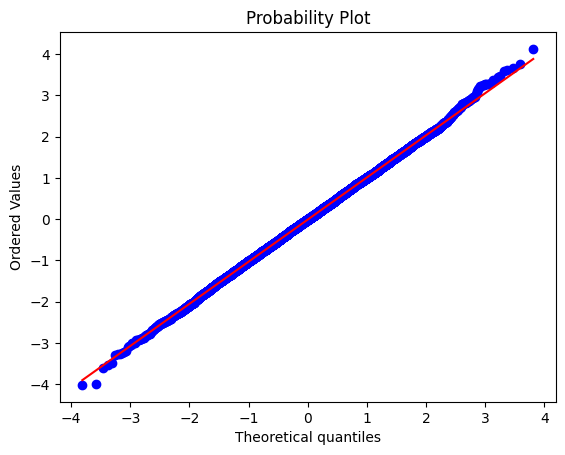

In [22]:
# (iv)

from scipy.stats import probplot

probplot(X, dist="norm", plot=plt)
plt.show()

__Exercise 3__

The demographic makeup of regions can offer crucial insights into various socio-economic factors. For policymakers, understanding age distributions can be particularly useful, as it can provide direction for initiatives ranging from educational policy to elderly care. In this section, we will work with a dataset detailing the age distribution across United States counties, broken down into specific age bins.

The files `county_age_dist.csv`, `fips_state.csv` and `fips_county.csv` contain information about the age distribution of counties in selected brackets as well as names and [FIPS](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) codes and additional information. 

__(a, i)__ Merge all three data frames into one `pandas.DataFrame` object names `data` with appropriate column names. __(ii)__ Remove the `info` column. Standardize column names and entries to be capitalized according to spelling rules. Remove any preceding whitespace if present for any entries. Run: 
```
data.head(4)
```

In [1]:
import pandas as pd
import numpy as np

# load data and standardize FIPS codes in order to join by them. 
county_age = pd.read_csv('../data/county_age_dist.csv', dtype={'fips':str})

fips_state = pd.read_csv('../data/fips_state.csv', sep = ';', dtype={'FIPS':str})
fips_state['FIPS'] = fips_state['FIPS'].str.zfill(2)

fips_county = pd.read_csv('../data/fips_county.csv', sep = ',', dtype={'FIPS':str})

# merge county_age and fips_county
data = county_age.set_index('fips').join(fips_county.set_index('fips')).reset_index() # add county info

# merge data and fips_state
data.set_index(keys = pd.Index([string[:2] for string in data['fips']]), inplace = True)
data = data.join(fips_state.set_index('FIPS')).reset_index(drop = True)

In [24]:
data = data.drop(columns = ' info')
data = data.rename(columns={" name": "County", "fips": "FIPS", " STATE": "State"})

def string_cleaner(string): 
    '''
    removes leading whitespace and capitalized first letter only. 
    '''
    
    if isinstance(string, str): 
    
        # make lowercase
        string = string.lower()

        # remove leading whitespace
        string = string.lstrip()

        # split string by whitespace, capitalize, and join again
        string = " ".join([s.capitalize() for s in string.split(" ")])
    
    return string

data[['County','State']] = data[['County','State']].apply(lambda x: [string_cleaner(string) for string in x])

In [25]:
data.head(4)

,FIPS,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,County,State
0,01001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,Alabama
1,01003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,Alabama
2,01005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,Alabama
3,01007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,Alabama


__(c)__ For each county and state, compute the proportion of elderly `CPE` and `SPE` (65 and older) to the total population as well as the proportion of young people `CPY` and `SPY` (24 or younger). Add those values to the data frame. You may ignore all FIPS regions that are not in states. Run: 
```
data.head(4)
```

In [26]:
proportion = lambda x: [x[0:1].sum(), x[7:9].sum()] / x.sum()

# for counties... 
county = data.iloc[:, 1:10].apply(lambda x: proportion(x), axis = 1)
data[['CPY', 'CPE']] = pd.DataFrame.from_dict(dict(zip(county.index, county.values))).T

# ... and for states
state = data.groupby('State').sum(numeric_only = False).iloc[:, 1:10].apply(lambda x: proportion(x), axis = 1)
state_df = pd.DataFrame.from_dict(dict(zip(state.index, state.values))).T
state_df = state_df.reset_index()
state_df = state_df.rename(columns={'index': 'State', 0: "SPY", 1: "SPE"})
data = data.merge(state_df, on = 'State')

In [27]:
data.head(4)

,FIPS,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,County,State,CPY,CPE,SPY,SPE
0,01001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,Alabama,0.242050,0.068815,0.224207,0.073172
1,01003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,Alabama,0.220623,0.081831,0.224207,0.073172
2,01005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,Alabama,0.213786,0.074807,0.224207,0.073172
3,01007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,Alabama,0.210674,0.069557,0.224207,0.073172


In [28]:
data.iloc[1000:1004,:]

,FIPS,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,County,State,CPY,CPE,SPY,SPE
1000,21015,59756,23101,28431,30991,30735,27651,18464,8927,3291,Boone County,Kentucky,0.258296,0.052812,0.224512,0.072382
1001,21017,8817,4008,4419,4414,5382,5203,4145,2505,928,Bourbon County,Kentucky,0.221416,0.086211,0.224512,0.072382
1002,21019,20700,9781,11381,11861,12383,13059,9861,5498,2987,Boyd County,Kentucky,0.212284,0.087016,0.224512,0.072382
1003,21021,11693,8112,5945,6435,7132,7345,5766,3434,1599,Boyle County,Kentucky,0.203495,0.087590,0.224512,0.072382
